<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


In [4]:
sac_csv = '../data/real_estate_data/sacramento_real_estate_transactions.csv'

shd = pd.read_csv(sac_csv)

shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
shd.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [6]:
shd.isnull().sum(axis = 0)

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
shd.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [8]:
shd.groupby('type').count()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude
type,,,,,,,,,,,
Condo,54,54,54,54,54,54,54,54,54,54,54
Multi-Family,13,13,13,13,13,13,13,13,13,13,13
Residential,917,917,917,917,917,917,917,917,917,917,917
Unkown,1,1,1,1,1,1,1,1,1,1,1


In [9]:
emb_dums = pd.get_dummies(shd.type, prefix="emb")
#emb_dums = emb_dums.drop("emb_Unknown", axis= 1)

#Look at emb_dums
emb_dums.head()

,emb_Condo,emb_Multi-Family,emb_Residential,emb_Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [10]:
shd = pd.concat([shd, emb_dums], axis=1)
shd = shd.drop("emb_Unkown", axis= 1)
shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,emb_Condo,emb_Multi-Family,emb_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR (Simple Linear Regression) model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

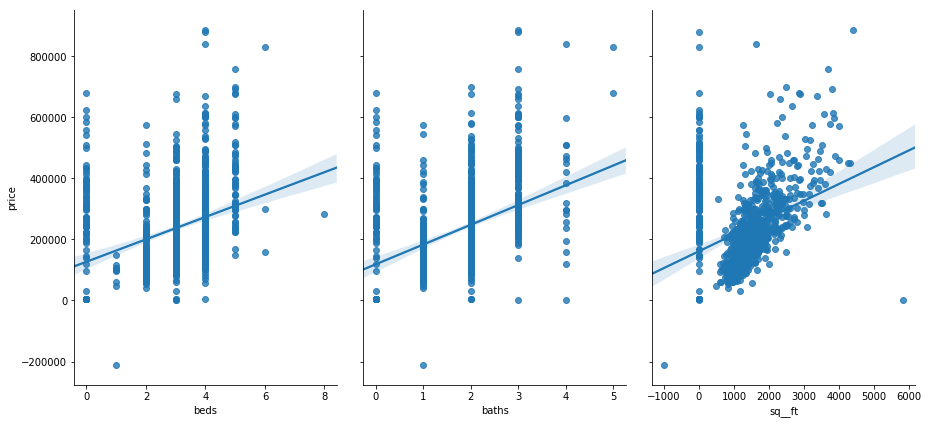

In [11]:
# include a "regression line"
sns.pairplot(shd, x_vars=['beds','baths','sq__ft'], y_vars='price',
             height=6, aspect=0.7, kind='reg')

In [12]:
shd.corr().loc['price'].sort_values()

emb_Condo          -0.158423
zip                -0.095918
longitude          -0.094262
emb_Multi-Family   -0.007638
latitude            0.100806
emb_Residential     0.144498
sq__ft              0.339628
beds                0.344752
baths               0.416718
price               1.000000
Name: price, dtype: float64

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [ ]:
# A: Baths, beds, sq_ft

### 5. Build a function that will take in two arrays `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [16]:
### SCIKIT-LEARN ###
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['baths', 'beds', 'sq__ft']
X = shd[feature_cols]
y = shd.price

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

120538.95054887567
[ 6.09157098e+04 -7.70086275e+03  2.08493711e+01]


In [21]:
import statsmodels.formula.api as smf

# create a fitted model with all three features
lm = smf.ols(formula='price ~ baths + beds + sq__ft', data=shd).fit()
lm.params

Intercept    120538.950549
baths         60915.709790
beds          -7700.862750
sq__ft           20.849371
dtype: float64

### 6. Interpret the intercept. Interpret the slope.

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     72.77
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.69e-42
Time:                        14:40:34   Log-Likelihood:                -12963.
No. Observations:                 985   AIC:                         2.593e+04
Df Residuals:                     981   BIC:                         2.595e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.205e+05   9838.767     12.251      0.000    1.01e+05     1.4e+05
baths       6.092e+04   8482.013      7.182      0.000    4.43e+04    7.76e+04
beds       -7700.8627   5950.068     -1.294      0.196   -1.94e+04    3975.462
sq__ft        20.8494      6.613      3.153      0.002       7.872      33.827
==============================================================================
Omnibus:                      245.975   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.420
Skew:                           1.346   Prob(JB):                    1.36e-124
Kurtosis:                       5.580   Cond. No.                     4.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

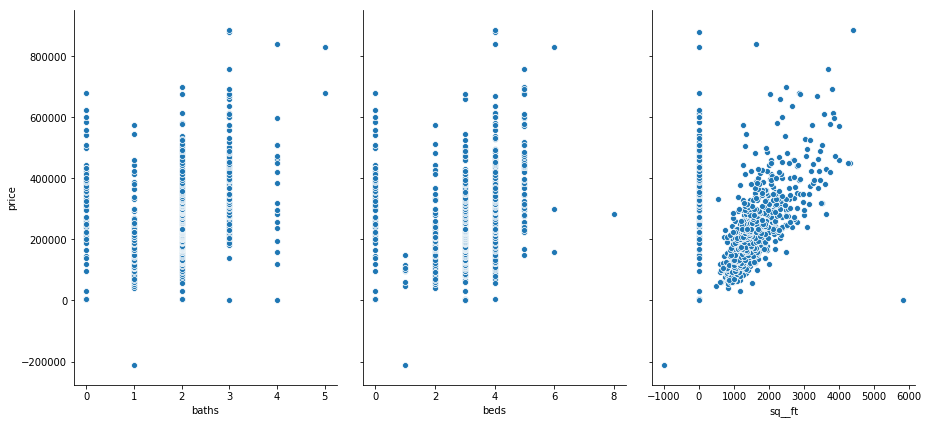

In [23]:
# scatter plot in Seaborn
sns.pairplot(shd, x_vars=['baths','beds','sq__ft'], y_vars='price', height=6, aspect=0.7);

### 7. Give an example of how this model could be used for prediction and how this model could be used for insights. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [ ]:
# A:

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [ ]:
# A: